# Exploratory Data Analysis with Python

## 1. Introduction

In this Jupyter Notebook, we will use a bank marketing campaign dataset to perform Exploratory Data Analysis (EDA) with pandas, seaborn and missingno library.

The bank conducted marketing campaign mostly via phone calls to offer clients to place a term deposit. If the client agreed to place the deposit, the client is marked as 'yes' for subscribed to a term deposit. Otherwise, the client is marked as 'no'.

## 2. Exploratory Data Analysis (EDA)

### 2.1. Library and Data Import

Below are the libraries we will be using for EDA.

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
import math

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

# Managing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Import
data = pd.read_csv('C:/Users/Lenovo/Downloads/PortugalBank/bank-additional-full.csv', delimiter =';', na_values = 'unknown')
# Remember to update the filepath to the correct location where you have saved the CSV file

In [3]:
# Take a quick glance at the data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 2.2. Univarivate Data Analysis

#### 2.2.1. Review summary statistics

In [4]:
# Display summary statistics
data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,40858,41108,39457,32591,40198,40198,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,11,3,7,2,2,2,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [5]:
# Transpose the summary statistics for better view
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188,NaN,NaN,NaN,40.0241,10.4212,17,32,38,47,98
job,40858,11,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41108,3,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,39457,7,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,32591,2,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,40198,2,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,40198,2,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.2.2. Review data types

In [6]:
# Review data types of each column in Qualified Leads
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
# Summarise number of columns by data type
data.dtypes.value_counts()

object     11
float64     5
int64       5
dtype: int64

#### 2.2.3. Examine distribution of data

##### CATEGORICAL DATA

In [8]:
# Identify column names containing categorical data
categorical_column = data.select_dtypes(object).columns
print(categorical_column)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [9]:
# Isolate all columns containing categorical data
data_categorical = data[categorical_column]
data_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


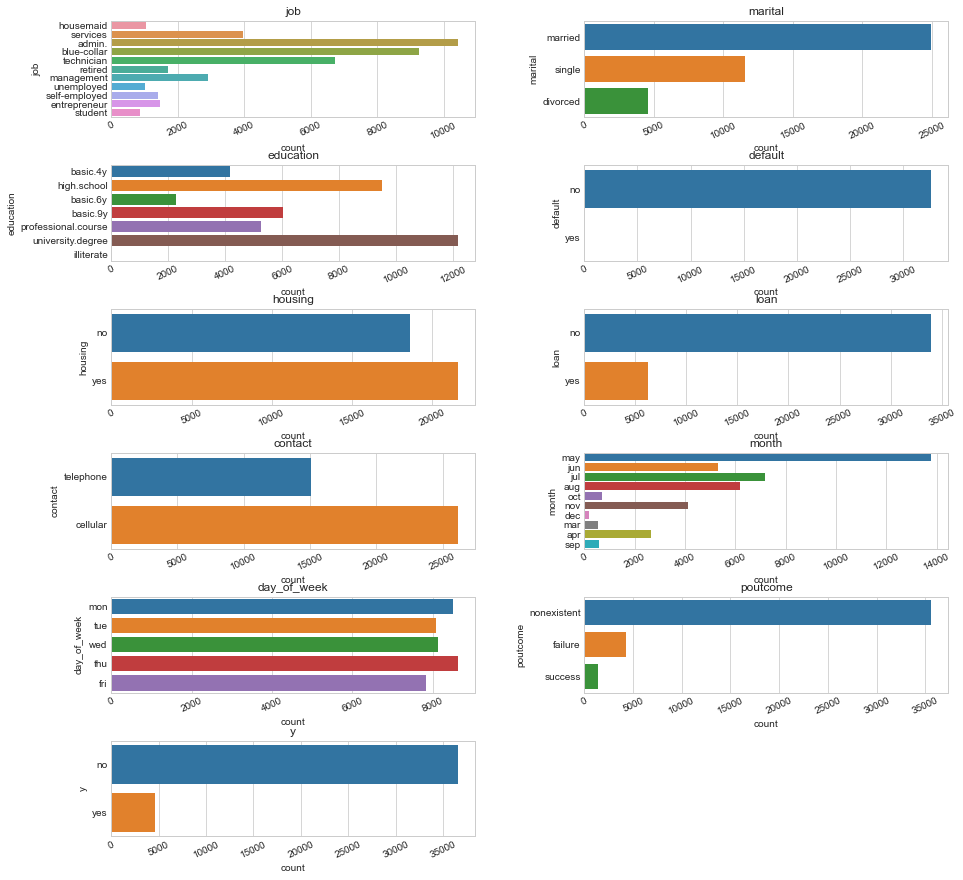

In [10]:
# Define a function to plot distribution
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1])/cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

# Plot distribution of categorical data
plot_distribution(data_categorical, cols = 2, width = 15, height = 15, hspace = 0.5, wspace = 0.3)

##### NUMERICAL DATA

In [11]:
# Isolate all columns containing numerical data by dropping categorical data
data_numerical = data.drop(columns = categorical_column)
data_numerical.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


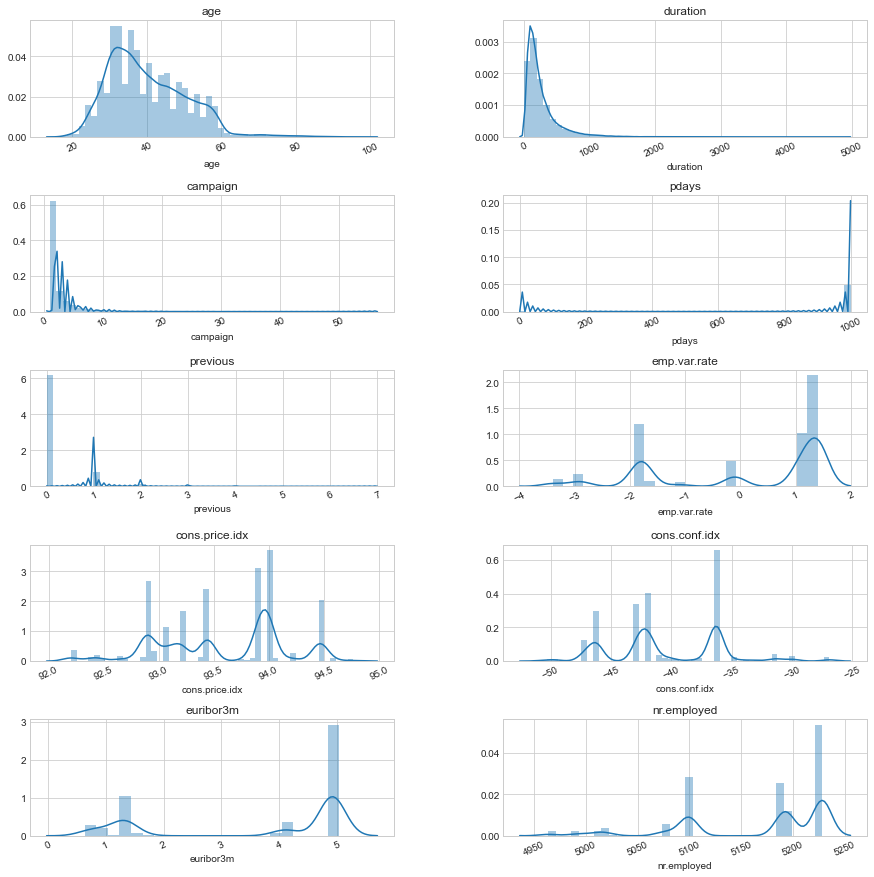

In [12]:
# Plot distribution of numercial data
plot_distribution(data_numerical, cols = 2, width = 15, height = 15, hspace = 0.5, wspace = 0.3)

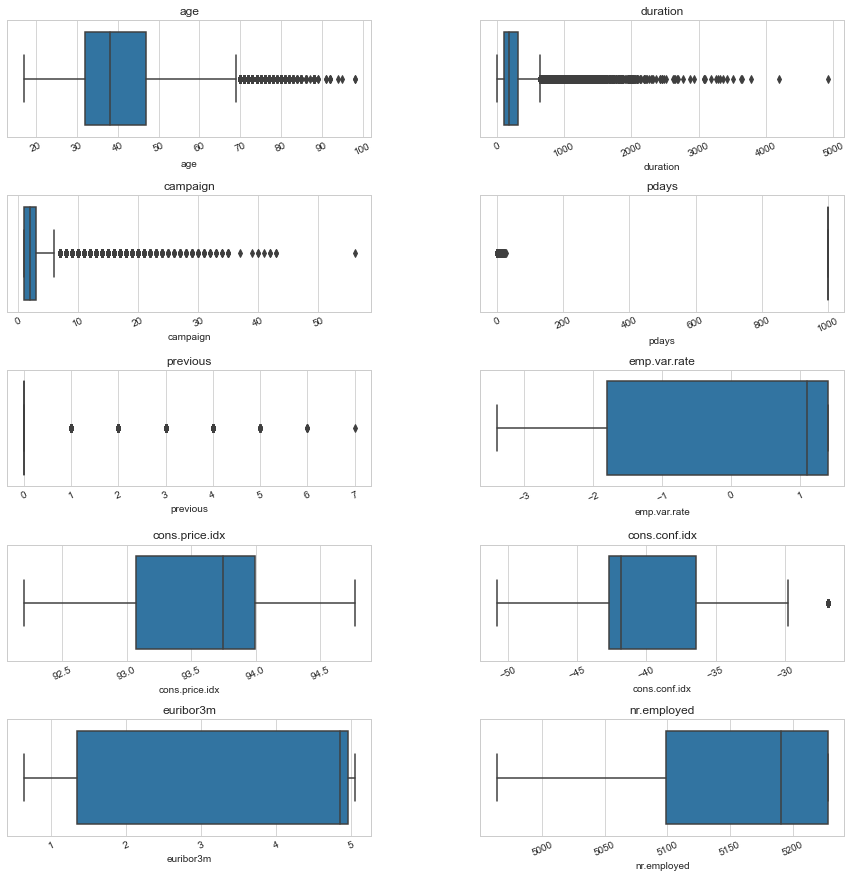

In [13]:
# Create box plots to summarise numerical data
def box_plot(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1])/cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(column)
        g = sns.boxplot(dataset[column])
        plt.xticks(rotation=25)
            
box_plot(data_numerical, cols = 2, width = 15, height = 15, hspace = 0.5, wspace = 0.3)

#### 2.2.4. Assess missing values

<AxesSubplot:>

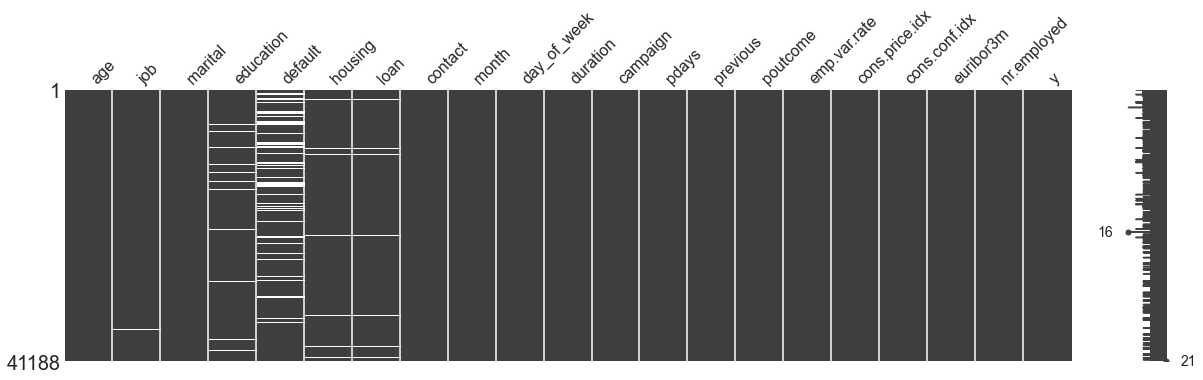

In [14]:
# Display nullity matrix
missingno.matrix(data, figsize = (20,5))

<AxesSubplot:>

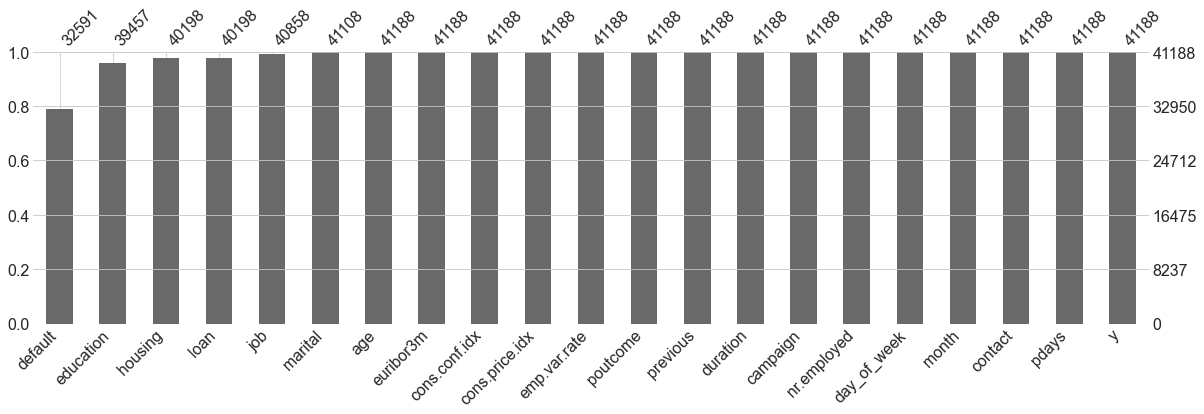

In [15]:
# Rank features based on descending number of missing values for Closed Deals
missingno.bar(data, sort = 'ascending', figsize = (20,5))

In [16]:
# Count missing values per column
data.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

### 2.3. Bivariate Data Analysis

#### 2.3.1. Compare categorical values to categorical values

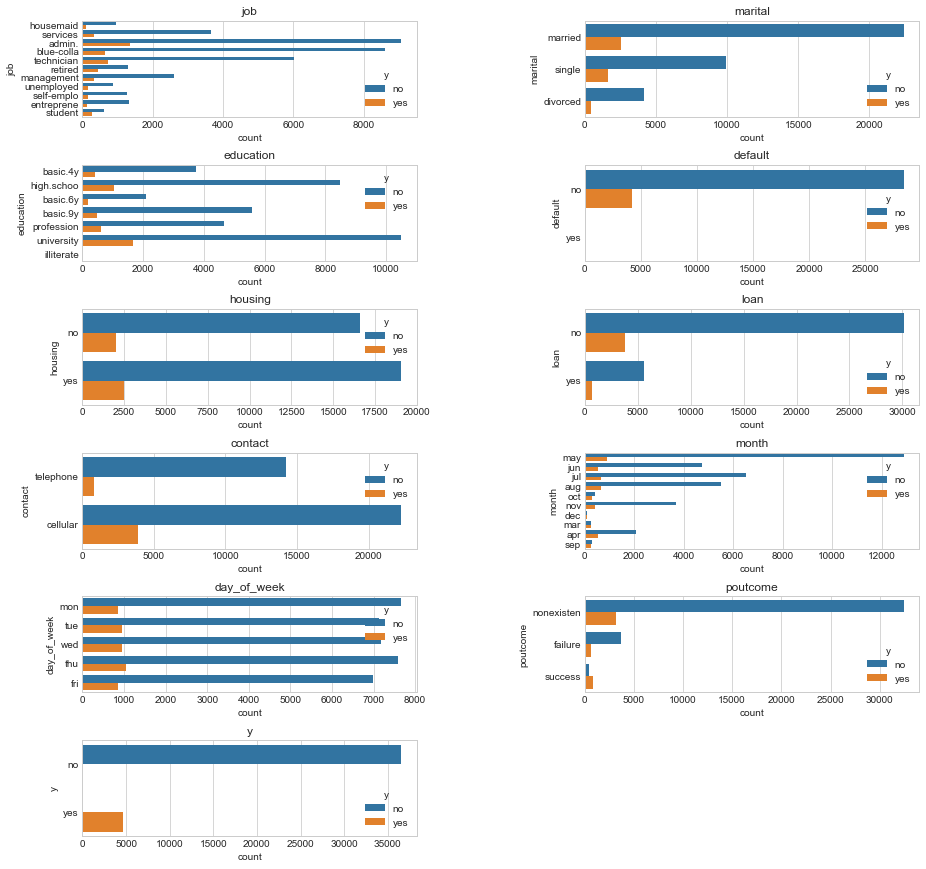

In [17]:
# Plot a count of categories from all categorical columns split by the decision to subscribe to a term deposit
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        g = sns.countplot(y=column, hue=hue, data=dataset)
        substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
        g.set(yticklabels=substrings)

plot_bivariate_bar(data, hue='y', cols=2, width=15, height=15, hspace=0.5, wspace=0.5)

<AxesSubplot:xlabel='count', ylabel='poutcome'>

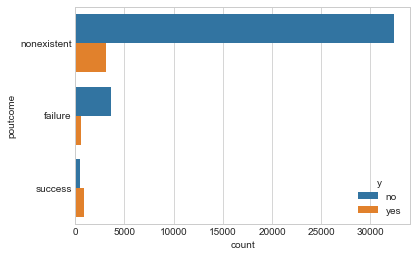

In [18]:
# Relationship between outcome of previous campaign and client's decision to subscribe to term deposit
sns.countplot(y='poutcome', hue='y', data=data)

#### 2.3.2. Compare numerical values against numerical values

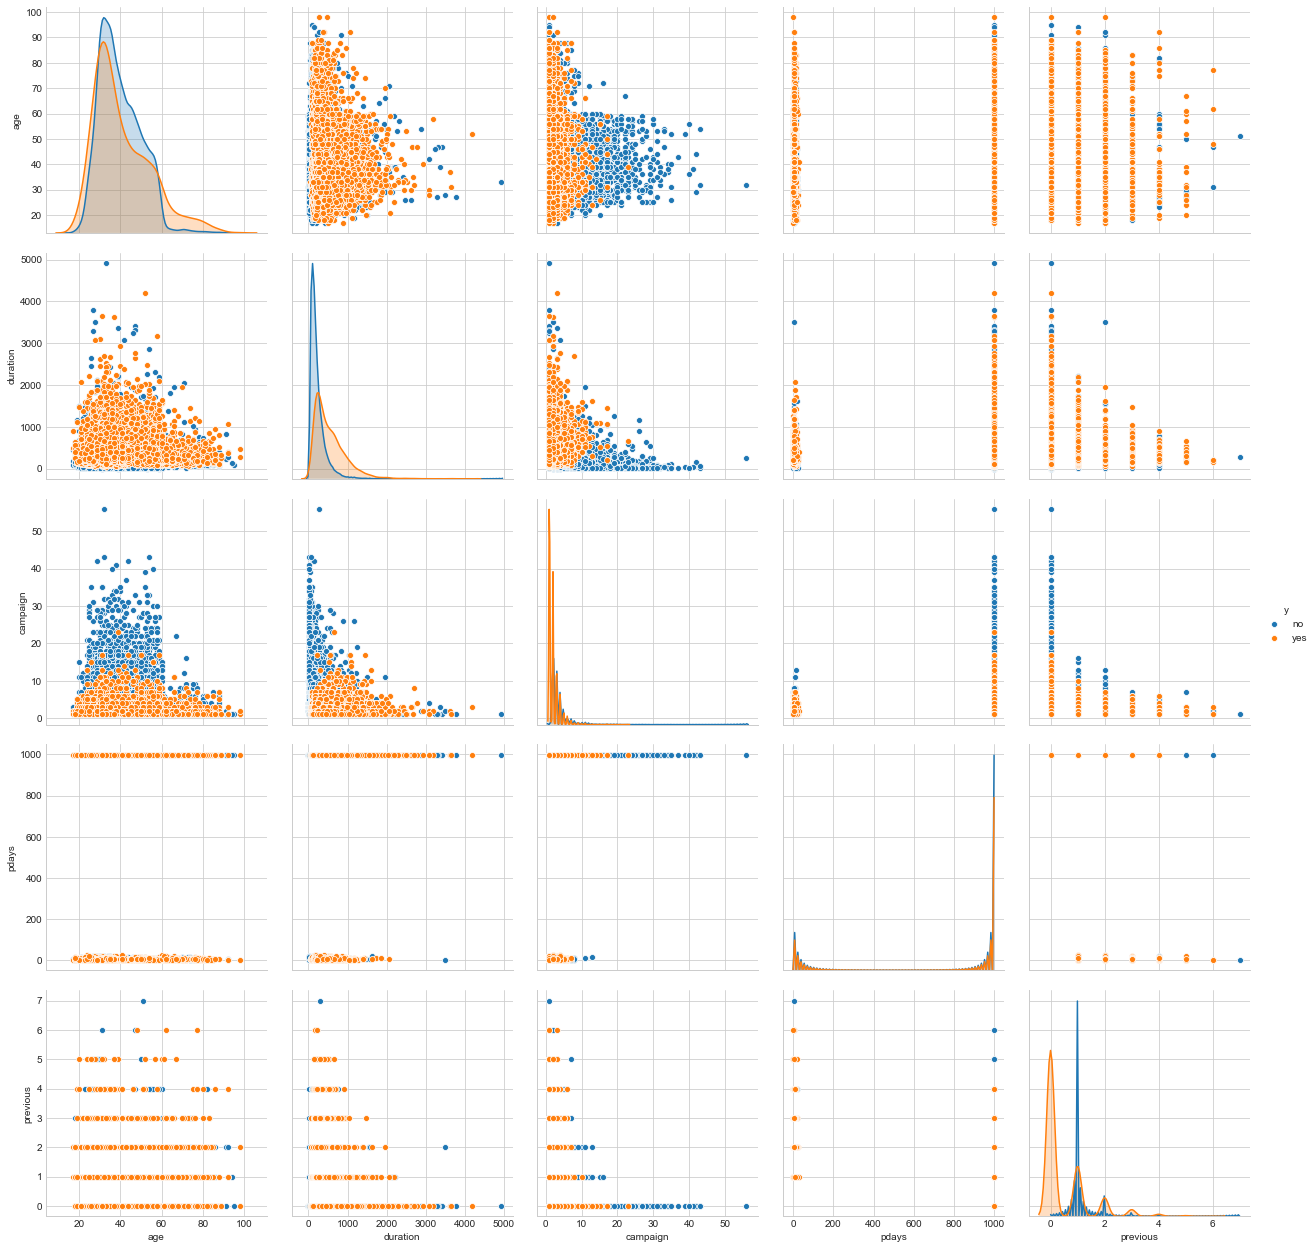

In [19]:
# Interaction between pairs of numerical columns related to client data and last contact
pairplot = sns.pairplot(data[['age', 'duration', 'campaign', 'pdays', 'previous', 'y']], hue = 'y', diag_kind = 'kde', size = 3.5)
pairplot.savefig('pairplot.png')

#### 2.3.3. Compare numerical values against categorical values

<AxesSubplot:xlabel='job', ylabel='duration'>

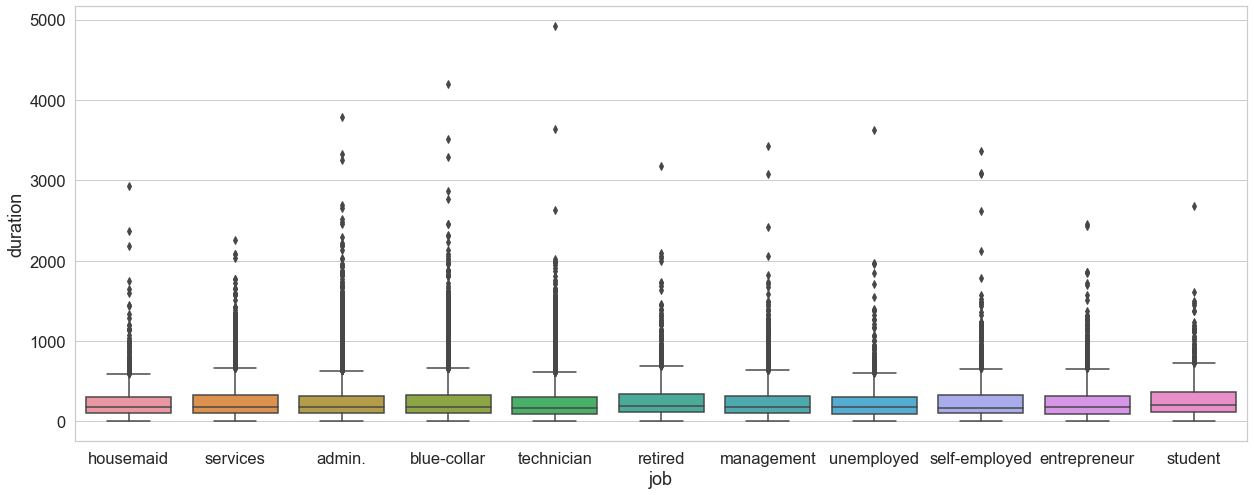

In [20]:
# Relationship between job and last contact duration
sns.set(rc={'figure.figsize':(21,8)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x = 'job', y = 'duration', data = data)

<AxesSubplot:xlabel='job', ylabel='duration'>

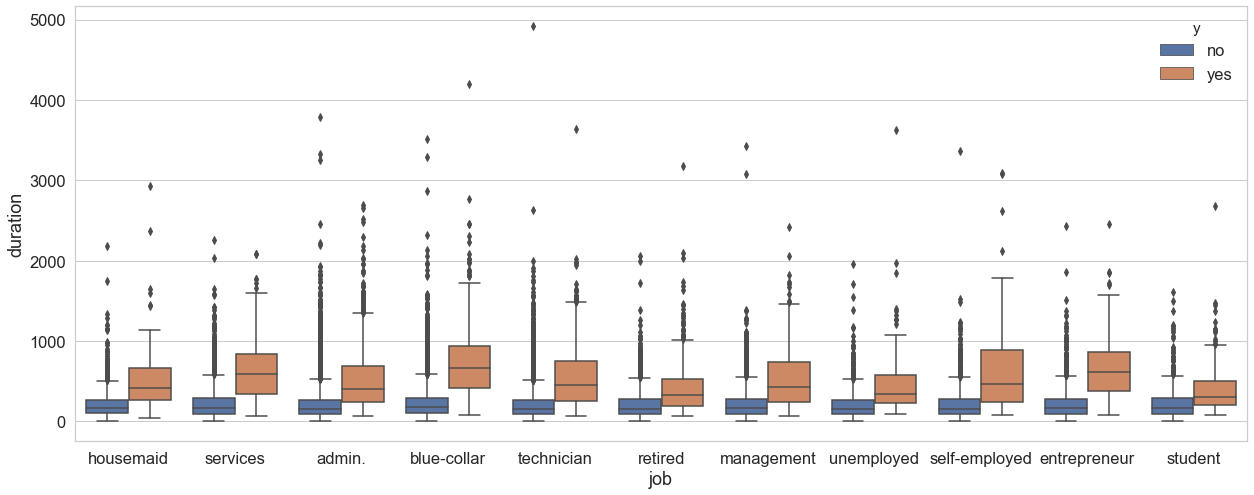

In [21]:
# Relationship between job and last contact duration against client's decision to subsribe to term deposit
sns.set(rc={'figure.figsize':(21,8)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x = 'job', y = 'duration', data = data, hue = 'y')

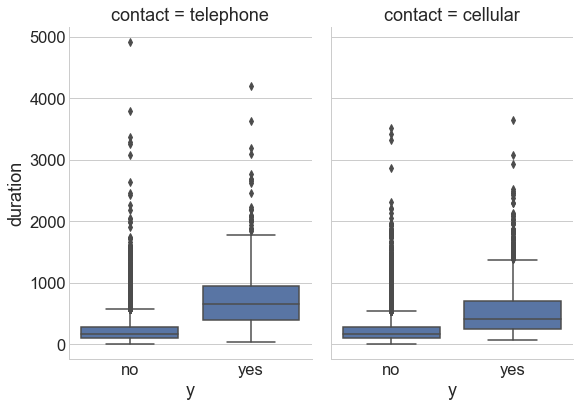

In [22]:
# Effect of last contact duration and contact mode against decision to subscribe to term deposit
plt.style.use('seaborn-whitegrid')
g = sns.FacetGrid(data, col = 'contact', size = 6, aspect = 0.7)
g = g.map(sns.boxplot, 'y', 'duration')

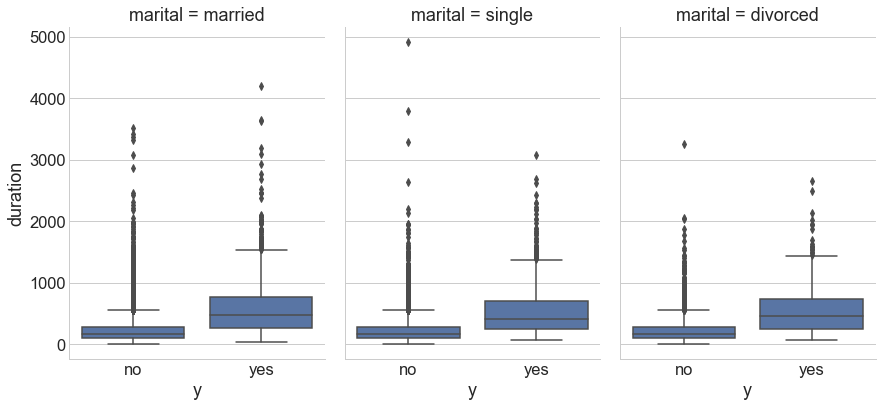

In [23]:
# Effect of last contact duration and marital status against decision to subscribe to term deposit
plt.style.use('seaborn-whitegrid')
g = sns.FacetGrid(data, col = 'marital', size = 6, aspect = 0.7)
g = g.map(sns.boxplot, 'y', 'duration')